In [95]:
import random
import math
from math import cos, sin, pi
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def rand_234(chasm, sigma, mod):
    while True:
        l1 = round(chasm / 2 * random.gauss(1, sigma)) * mod
        l2 = round(chasm / 2 * random.gauss(1, sigma)) * mod**2
        l3 = round(chasm / 2 * random.gauss(1, sigma)) * mod

        if l1 + l2 + l3 > chasm:
            return [l1, l2, l3]

def easySolve(th1, th2, el, P1, P2, l1, l2, l3):
    alpha, gamma, el = pi*th1/180, pi*th2/180, pi*el/180
    
    # Positionen von P3 und P4
    P3 = P1 + l1 * np.array([np.cos(alpha), np.sin(alpha)])
    P4 = P2 + l3 * np.array([np.cos(gamma), np.sin(gamma)])

    chasm = math.sqrt((P4[0] - P3[0])**2 + (P4[1] - P3[1])**2)
    
    return chasm - l2

def solveChasm(th1, th2, el, P1, P2, l1, l2, l3):

    loss = easySolve(th1, th2, el, P1, P2, l1, l2, l3)
    lastloss = 0                    # necessary for signum
    th1fin, th2fin = th1, th2
    alterator = 1

    optimizer = abs(loss)

    while optimizer > 1e-6:
        if lastloss/loss < 0:       # signum
            alterator = alterator / 2

        lastloss = loss             # change signum iteration step

        if loss > 0:                # chasmn too big
            th1fin = (th1fin - alterator)%360
            th2fin = (th2fin + alterator)%360
            loss = easySolve(th1fin, th2fin, el, P1, P2, l1, l2, l3)
        elif loss < 0:              # chasmn too small
            th1fin = (th1fin + alterator)%360
            th2fin = (th2fin - alterator)%360
            loss = easySolve(th1fin, th2fin, el, P1, P2, l1, l2, l3)

        optimizer = abs(loss)

    return th1fin%360, th2fin%360
    


In [136]:
sigma = 0.25

Points = [[[0, 0]]]

# Set the length
length = 40

displacement = []

# Generate the points
for i in range(10):
    Points[0].append([Points[0][-1][0] + 2*length, 0])
    Points[0].append([Points[0][-1][0] + length, 0])
Points[0].append([Points[0][-1][0] + 2*length, 0])

for k in range(20):
    Points.append([])

    if k % 2 == 0:
        for i in range(int(len(Points[-2]) / 2)):
            idx = i * 2
            P1 = Points[-2][idx]
            P2 = Points[-2][idx + 1]

            if math.dist(P1, P2) > 2 * (1 + sigma) * length:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1 - sigma)
            elif math.dist(P1, P2) < 2 * (1 - sigma) * length:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1 + sigma)
            else:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1)

            el = math.degrees(math.atan2(P2[1] - P1[1], P2[0] - P1[0]))

            th1 = (el + 60)%360
            th2 = (el + 120)%360

            result = solveChasm(th1, th2, el, P1, P2, l1, l2, l3)

            displacement.append(math.sqrt(((cos(th1/180*pi)-cos(result[0]/180*pi))*l1)**2 + ((sin(th1/180*pi)-sin(result[0]/180*pi))*l1)**2))
            displacement.append(math.sqrt(((cos(th2/180*pi)-cos(result[1]/180*pi))*l3)**2 + ((sin(th2/180*pi)-sin(result[1]/180*pi))*l3)**2))

            Points[-1].append([P1[0] + l1 * cos(result[0] / 180 * pi), P1[1] + l1 * sin(result[0] / 180 * pi)])
            Points[-1].append([P2[0] + l3 * cos(result[1] / 180 * pi), P2[1] + l3 * sin(result[1] / 180 * pi)])
            print(P1, P2, el, th1, th2, result)
            print(l1,l2,l3)
            print('')

    elif k % 2 == 1:
        Points[-1].append([Points[-3][0][0], Points[-3][0][1] + (Points[-2][0][1] - Points[-3][0][1]) * 2])

        for i in range(int(len(Points[-2]) / 2 - 1)):
            idx = i * 2 + 1
            P1 = Points[-2][idx]
            P2 = Points[-2][idx + 1]

            if math.dist(P1, P2) > 2 * (1 + sigma) * length:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1 - sigma)
            elif math.dist(P1, P2) < 2 * (1 - sigma) * length:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1 + sigma)
            else:
                [l1, l2, l3] = rand_234(math.dist(P1, P2), sigma, 1)

            el = math.degrees(math.atan2(P2[1] - P1[1], P2[0] - P1[0]))

            th1 = (el + 60)%360
            th2 = (el + 120)%360

            result = solveChasm(th1, th2, el, P1, P2, l1, l2, l3)

            displacement.append(math.sqrt(((cos(th1/180*pi)-cos(result[0]/180*pi))*l1)**2 + ((sin(th1/180*pi)-sin(result[0]/180*pi))*l1)**2))
            displacement.append(math.sqrt(((cos(th2/180*pi)-cos(result[1]/180*pi))*l3)**2 + ((sin(th2/180*pi)-sin(result[1]/180*pi))*l3)**2))

            Points[-1].append([P1[0] + l1 * cos(result[0] / 180 * pi), P1[1] + l1 * sin(result[0] / 180 * pi)])
            Points[-1].append([P2[0] + l3 * cos(result[1] / 180 * pi), P2[1] + l3 * sin(result[1] / 180 * pi)])
            print(P1, P2, el, th1, th2, result)
            print(l1,l2,l3)
            print('')

        Points[-1].append([Points[-3][-1][0], Points[-3][-1][1] + (Points[-2][-1][1] - Points[-3][-1][1]) * 2])
    

        

[0, 0] [80, 0] 0.0 60.0 120.0 (49.45113945007324, 130.54886054992676)
29 33 49

[120, 0] [200, 0] 0.0 60.0 120.0 (74.14819431304932, 105.85180568695068)
38 57 53

[240, 0] [320, 0] 0.0 60.0 120.0 (13.110061645507812, 166.8899383544922)
17 43 21

[360, 0] [440, 0] 0.0 60.0 120.0 (66.02577590942383, 113.97422409057617)
46 47 37

[480, 0] [560, 0] 0.0 60.0 120.0 (53.34274482727051, 126.65725517272949)
45 34 34

[600, 0] [680, 0] 0.0 60.0 120.0 (67.16708946228027, 112.83291053771973)
46 46 42

[720, 0] [800, 0] 0.0 60.0 120.0 (65.85226058959961, 114.14773941040039)
44 44 44

[840, 0] [920, 0] 0.0 60.0 120.0 (59.87210655212402, 120.12789344787598)
31 47 35

[960, 0] [1040, 0] 0.0 60.0 120.0 (32.6284294128418, 147.3715705871582)
29 32 28

[1080, 0] [1160, 0] 0.0 60.0 120.0 (51.558088302612305, 128.4419116973877)
49 29 36

[1200, 0] [1280, 0] 0.0 60.0 120.0 (61.75446319580078, 118.24553680419922)
34 43 48

[48.14528281024465, 37.23274087091501] [130.37970584071613, 36.554913577523386] -0.4722

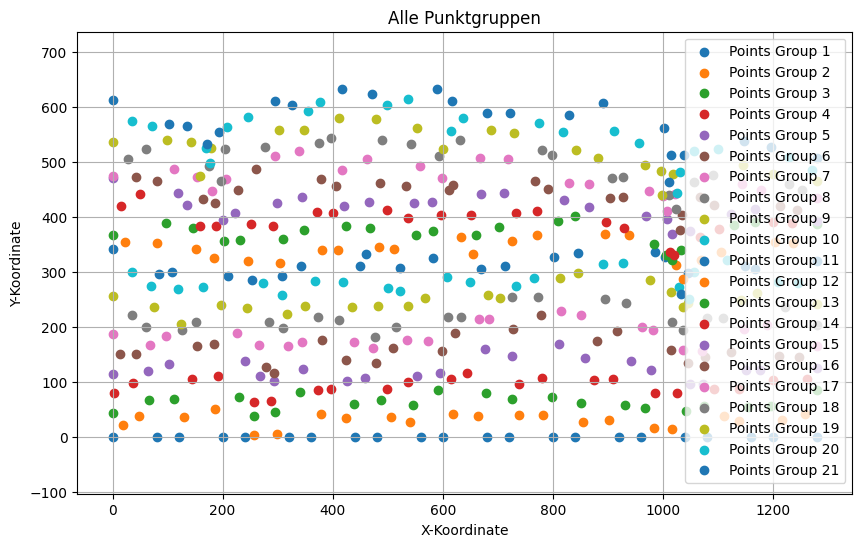

In [137]:
# Plotten der Punkte
plt.figure(figsize=(10, 6))

# Plotten der einzelnen Punktgruppen
for idx, point_group in enumerate(Points):
    plt.scatter(*zip(*point_group), label=f'Points Group {idx+1}')

plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.legend()
plt.title('Alle Punktgruppen')
plt.axis('equal')
plt.grid(True)
plt.show()

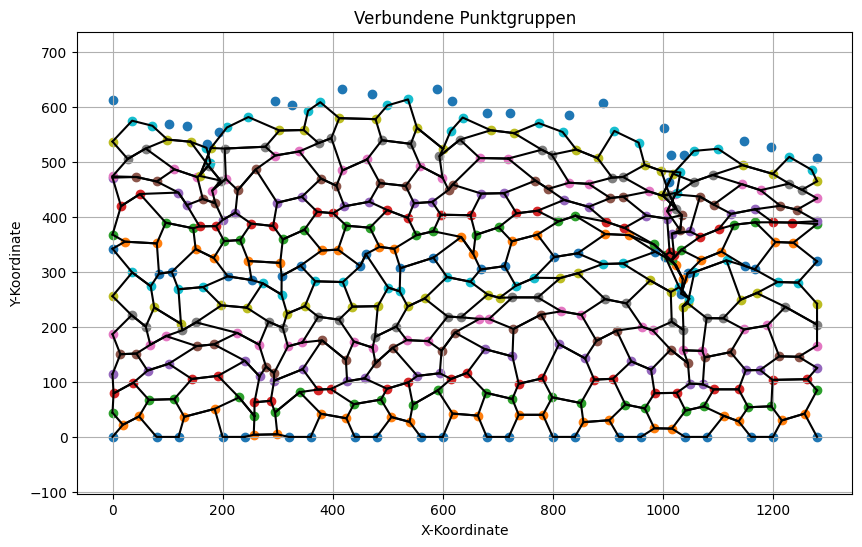

In [138]:
def connect_points_alternating(Points):
    for group_index in range(0, len(Points) - 1, 2):

        primary_group = Points[group_index]
        secondary_group = Points[group_index + 1]
        i, j = 0, 0
        while i < len(primary_group) and j < len(secondary_group):
            if j + 1 < len(secondary_group):
                try:
                    plt.plot(
                        [primary_group[i][0], secondary_group[j][0], secondary_group[j + 1][0], primary_group[i + 1][0], primary_group[i + 2][0]],
                        [primary_group[i][1], secondary_group[j][1], secondary_group[j + 1][1], primary_group[i + 1][1], primary_group[i + 2][1]],
                        'k-'
                    )
                except:
                    plt.plot(
                        [primary_group[i][0], secondary_group[j][0], secondary_group[j + 1][0], primary_group[i + 1][0]],
                        [primary_group[i][1], secondary_group[j][1], secondary_group[j + 1][1], primary_group[i + 1][1]],
                        'k-'
                    )
                i += 2
                j += 2

        if group_index != 0:
            secondary_group = Points[group_index - 1]

            i, j = 0, 0
            while i < len(primary_group) and j < len(secondary_group):
                if j + 1 < len(secondary_group):
                    try:
                        plt.plot(
                            [primary_group[i][0], secondary_group[j][0], secondary_group[j + 1][0], primary_group[i + 1][0], primary_group[i + 2][0]],
                            [primary_group[i][1], secondary_group[j][1], secondary_group[j + 1][1], primary_group[i + 1][1], primary_group[i + 2][1]],
                            'k-'
                        )
                    except:
                        plt.plot(
                            [primary_group[i][0], secondary_group[j][0], secondary_group[j + 1][0], primary_group[i + 1][0]],
                            [primary_group[i][1], secondary_group[j][1], secondary_group[j + 1][1], primary_group[i + 1][1]],
                            'k-'
                        )
                    i += 2
                    j += 2


plt.figure(figsize=(10, 6))

# Plotten der einzelnen Punktgruppen
for idx, point_group in enumerate(Points):
    plt.scatter(*zip(*point_group))

# Verbinden der Punkte nach der beschriebenen Methode
connect_points_alternating(Points)

plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Verbundene Punktgruppen')
plt.axis('equal')
plt.grid(True)
plt.show()

In [139]:
del Points[0]
Threads = []
for i in range(len(Points)-1):
    row = []
    j = 0
    while j < len(Points[0]):
        if i%2 == 0:
            row.append(Points[i+1][j])
            row.append(Points[i][j])
            row.append(Points[i][j+1])
            row.append(Points[i+1][j+1])
            j += 2
        else:
            row.append(Points[i][j])
            row.append(Points[i+1][j])
            row.append(Points[i+1][j+1])
            row.append(Points[i][j+1])
            j += 2
    Threads.append(row)

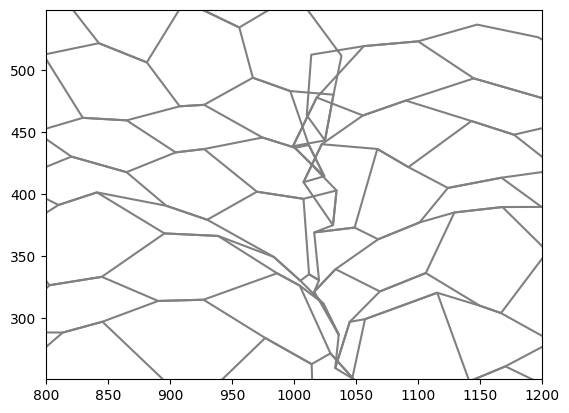

In [142]:
# Plotting the points from the list of lists
plt.figure()

for thread in Threads:
    # Unpacking the points into x and y coordinates for each thread
    x_coords, y_coords = zip(*thread)
    plt.plot(x_coords, y_coords, color = 'grey')  # Plot each thread with markers

# Set axis equal to maintain the correct proportions
plt.axis('equal')

# Labels for clarity
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.title("Plot of Threads")

plt.xlim(800, 1200)
plt.ylim(300, 500)

# Show the plot
plt.show()

In [199]:
interpolated_threads = {i + 1: thread for i, thread in enumerate(Threads)} # name of the other methods, just copied for data

def polygon_area(vertices):
    """Calculate the area of a polygon using the Shoelace theorem.
    
    Args:
        vertices (list or array): A list of (x, y) coordinates of the polygon's vertices.
    
    Returns:
        float: The area of the polygon.
    """
    x = np.array([v[0] for v in vertices])
    y = np.array([v[1] for v in vertices])
    
    # Shoelace formula
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def calculate_distance(p1, p2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def points_are_close(p1, p2, tol=1e-5):
    """Check if two points are close to each other within a specified tolerance."""
    return abs(p1[0] - p2[0]) < tol and abs(p1[1] - p2[1]) < tol

blacklist = []
distances = []
areas = []

for j in range(len(interpolated_threads)):
    thread = interpolated_threads[j+1]
    if j < len(interpolated_threads)-1:
        nextthread = interpolated_threads[j+2]
    else:
        nextthread = 0
    for i in range(len(thread)):  # Iterate up to the second to last point
        current_point = thread[i]

        # Check if the current point is already in the blacklist
        p1flag = False
        p2flag = False
        for blacklisted_point in blacklist:
            if points_are_close(current_point, blacklisted_point):
                p1flag = True
            if i < len(thread) - 1:
                next_point = thread[i + 1]
                if points_are_close(next_point, blacklisted_point):
                    p2flag = True

        if p1flag and p2flag:
            continue

        if i < len(thread) - 1:
            next_point = thread[i + 1]
            # If the current point is not in the blacklist, calculate the distance to the next
            distance = calculate_distance(current_point, next_point)
            distances.append(round(distance,1))

        blacklist.append(current_point)
    if j < len(interpolated_threads)-1:
        if j%2 == 0:
            i=0
            while i < len(thread)//4:
                try:
                    area = polygon_area([thread[4*i], thread[4*i+1], thread[4*i+2], thread[4*i+3], nextthread[4*i+2], nextthread[4*i+1]])
                    areas.append(area)
                except:
                    0
                i+=1
        else:
            i=0
            while i < (len(thread)-4)//4:
                try:
                    area = polygon_area([thread[4*i+2], thread[4*i+3], thread[4*i+4], thread[4*i+5], nextthread[4*i+4], nextthread[4*i+3]])
                    areas.append(area)
                except:
                    0
                i+=1


displacements = displacement


print(distances)
print(displacements)
print(areas)

[20.0, 20.0, 20.0, 26.0, 15.0, 28.0, 18.0, 16.0, 22.0, 20.0, 21.0, 20.0, 26.0, 16.0, 20.0, 21.0, 21.0, 19.0, 20.0, 22.0, 28.0, 14.0, 22.0, 18.0, 22.0, 18.0, 15.0, 20.0, 20.0, 22.0, 26.0, 24.0, 20.0, 19.0, 26.0, 20.0, 25.0, 20.0, 19.0, 25.0, 17.0, 19.0, 16.0, 21.0, 14.0, 16.0, 14.0, 27.0, 16.0, 17.0, 25.0, 23.0, 22.0, 20.0, 19.0, 26.0, 23.0, 20.0, 20.0, 15.0, 23.0, 25.0, 12.0, 22.0, 23.0, 23.0, 23.0, 14.0, 20.0, 19.0, 11.0, 30.0, 21.0, 18.0, 22.0, 22.0, 21.0, 27.0, 26.0, 29.0, 21.6, 24.5, 16.8, 15.0, 21.0, 32.0, 14.0, 13.0, 16.0, 24.0, 21.0, 20.0, 14.4, 15.4, 22.4, 15.0, 17.0, 23.0, 29.0, 23.0, 22.0, 29.0, 27.0, 16.0, 17.0, 20.0, 14.0, 22.0, 19.0, 21.0, 15.0, 20.0, 17.0, 19.0, 20.0, 24.0, 18.0, 19.2, 14.1, 22.4, 22.4, 15.4, 20.0, 13.0, 24.0, 23.0, 18.0, 17.0, 16.0, 21.6, 14.1, 24.8, 20.0, 18.0, 16.0, 21.0, 21.0, 16.0, 21.0, 17.0, 17.0, 19.0, 18.0, 21.0, 30.0, 20.0, 25.0, 20.0, 12.0, 19.0, 17.0, 25.0, 16.0, 17.0, 20.0, 14.1, 16.0, 18.0, 17.0, 13.0, 14.0, 24.0, 21.0, 26.0, 23.0, 28.0, 20.

In [202]:
# # mega_distances = distances
# # mega_displacements = displacements
# # mega_areas = areas

# mega_distances = mega_distances + distances
# mega_displacements = mega_displacements + displacements
# mega_areas = mega_areas + areas

Avg Distance:  20.11991199119912   Sigma:  4.775466685095947  ->  23.7 %
Avg Displacement:  4.161162651323221   Sigma:  3.81770941069154
Avg Area:  945.4491842795824   Sigma:  244.55747487440934
Datapoints:  Distance:  1818  Displacements:  1260  Areas:  504


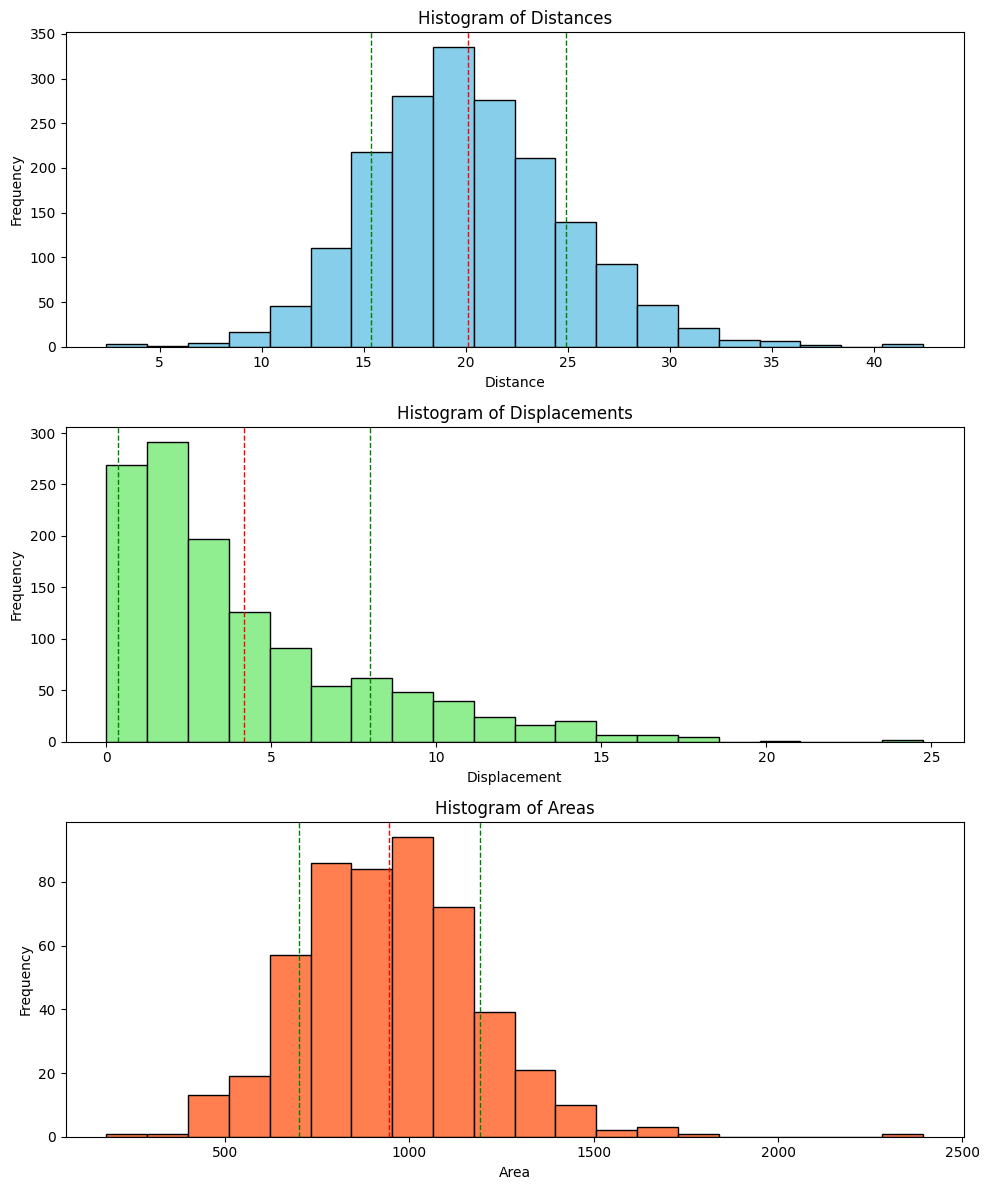

In [203]:
distances = mega_distances
displacements = mega_displacements
areas = mega_areas

import numpy as np
import matplotlib.pyplot as plt

# Assuming distances, displacements, and areas have already been populated

# Calculate statistics for distances
avg_distance = np.mean(distances)
sigma_distance = np.std(distances)

# Calculate statistics for displacements
avg_displacement = np.mean(displacements)
sigma_displacement = np.std(displacements)

# Calculate statistics for areas
avg_area = np.mean(areas)
sigma_area = np.std(areas)

# Print the calculated statistics
print('Avg Distance: ', avg_distance, '  Sigma: ', sigma_distance, ' -> ', round(sigma_distance / avg_distance, 3) * 100, '%')
print('Avg Displacement: ', avg_displacement, '  Sigma: ', sigma_displacement)
print('Avg Area: ', avg_area, '  Sigma: ', sigma_area)

print('Datapoints:  Distance: ', len(distances), ' Displacements: ', len(displacements), ' Areas: ', len(areas))



# Create subplots for histograms
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 subplots: for distances, displacements, and areas

# Histogram for distances
ax[0].hist(distances, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Distances')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Frequency')
ax[0].axvline(avg_distance, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[0].axvline(avg_distance + sigma_distance, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[0].axvline(avg_distance - sigma_distance, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Histogram for displacements
ax[1].hist(displacements, bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('Histogram of Displacements')
ax[1].set_xlabel('Displacement')
ax[1].set_ylabel('Frequency')
ax[1].axvline(avg_displacement, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[1].axvline(avg_displacement + sigma_displacement, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[1].axvline(avg_displacement - sigma_displacement, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Histogram for areas
ax[2].hist(areas, bins=20, color='coral', edgecolor='black')
ax[2].set_title('Histogram of Areas')
ax[2].set_xlabel('Area')
ax[2].set_ylabel('Frequency')
ax[2].axvline(avg_area, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[2].axvline(avg_area + sigma_area, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[2].axvline(avg_area - sigma_area, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Adjust layout and show plot
plt.tight_layout()
plt.show()